# Response Themes for "What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"

* Goal: Extract theme keywords from `hinderances`, `integrations`, `workflow_needs_addressed`, `workflow_needs_not_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [3]:
rs = np.random.RandomState(123)

In [4]:
pd.set_option('max_colwidth', 1000)

In [5]:
df = pd.read_csv('survey_short_columns.csv')

In [6]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [7]:
responses = df.hinderances

In [8]:
responses.isnull().value_counts()

True     943
False    763
Name: hinderances, dtype: int64

In [9]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [10]:
show(responses.sample(20, random_state=rs))

0) Jupyter Notebook "Windows 7+" experience is inferior to Linux one

1) Integration with text editor 

2) Version control (and, which is related, collaborative version control).

3) Doesn't seem to fit with building a large project, prefer IDE

4) remembering how to get it setup

5) better connections to external DBs, easier interact widgets.

6) Primarily use R, Rstudio is better for R.

7) * a "clear and run all" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open

8) School assignments

9) In ML, I have a cell output the loss at each epoch or few thousand iterations. This makes the output really long and to go between cells I have to scroll a lot to get past the wall of text I made.

10) The notebook workflows are very linear, doing experiments is difficult. Also some source control/diff tool would be really nice.

11) - Better edi

In [11]:
themes = {
    'version' : ['version control', 'diff', 'source control', 'git'],
    'collab': ['shar(e|ing)', 'collab'],
    'development' : ['text editor', 'ide(\W|$)', 'vim', 'emacs', 'editing',
                     'key binding', 'key mapping', 'keyboard', 'shortcuts',
                     'debug', 'programming', 'widgets', 'view', 'interact', 
                     'dataframes', 'ui', 'design', 'linear', 'search', 'theme', 
                     'collapse',  'organization', 'proliferation', 'cut', 
                     'merge', 'completion', 'aesthetic', 'scroll'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 
               'customization', 'windows'],
    'integrations' : ['connections', 'db', 'rstudio'],
    'language': ['clojure', 'scala', 'c#', 'r(\W|$)'],
    'disseminate' : ['publication', 'export', 
                     'deploy', 'authoring', 'dashboard', 'latex', 'slides'],
    'reuse': ['reuse', 'module', 'cron'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 
                'windows', 'ipad', 'slow', 'performance']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [12]:
import re

In [13]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [14]:
def tag_themes(responses, themes):
    tagged = responses.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = responses.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [15]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

reuse 30
development 275
language 23
integrations 16
collab 55
disseminate 48
version 139
setup 89
robust 44


1    294
0    286
2    138
3     31
4     14
Name: themes, dtype: int64

In [16]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,hinderances,themes
1192,I prefer Juliabox which I don't need to administer and is in the cloud.,
1359,Some things just work more efficiently for me to script directly in Python.,
885,I don't need it more often,
196,I use it for hobby projects and only rarely at work. For scientific hobby prokects I use it extensively.,
1253,I use it heavily to do exploratory data analysis. I conduct trainings often & feel Jupyter is the best way to do it.,
956,Better integration with batch-based computing clusters,
1384,"Nothing really, it's already pretty frequent.",
542,The requirement for sequential execution of cells and no concepts of 'modulazation' (call cell x in notebook y) means it is always somewhat cumbersome to use if you are doing anything complicated. But mostly the reluctance of others to use it.,
824,Multiple checkpoints for notebooks,
1474,Lack of proper equation numbering and referencing (same for table of contents etc).,


In [68]:
themes = {
 'collab': ['concurrent', 'multi-?user', 'shar(e|ing)', 'simultaneous', 'collab'],
 'development': ['visualization', 'applications', 'develop', 'design',
    'format', 'development', 'polyglot', 'key mapping', 'data creat', 'programming',
    'completion', 'variable', 'test', 'proliferation', 'linear', 'literate', 'key binding',
    'scroll', 'theme', 'integrat(ing|ion)', 'filing', 'packages', 'parallel',
    'view', 'plot', 'vim', 'data entry', 'edit(ing|or)', 'debug', 'ui', 'search',
    'organization', 'lint', 'cut', 'browse', 'intellisense', 'spell check',  
    'shortcuts', 'ide(\W|$)', 'diagram', 'script', 'compiler', 'dataframes', 'graphic',
    'input', 'complet(e|ion)', 'project', 'merge', 'keyboard', 'branch',
    'aesthetic', 'visual', 'collapse', 'widgets', 'emacs', 'interact', 'organi(s|z)',
    'refactor', 'workspace', 'notes', 'clutter', 'interface', 'understand'],
 'disseminate': ['distribution', 'gui', 'authoring', 'writing', 'story', 'textbook', 
    'deploy', 'standalone', 'books', 'manuscript', 'paper', 'send', 'web', 'publi(sh|cation)',
    'product(ion|i(s|z)ation)', 'app(s|lication)', 'push', 'present', 'export', 'blog', 'embed',
    'report', 'pages', 'latex', 'bundle', 'dashboard', 'publication', 'bibliograph',
    'citation', 'slides', 'document', 'business', 'documents', 'transition'],
 'integrations': ['spark', 'db', 'connections', 'd3', 'rstudio', 'fenics', 'sas', 'conda',
    'native', 'pentadactyl', 'sheets', 'in-house', 'django', 'ubuntu', 'excel'],
 'language': ['sage', 'c#', 'scala', 'perl', 'clojure', 'haskell', 'sql', 'julia',
    'r($|\W)', 'matlab', 'fortran', 'c\+\+', 'r(\W|$)', 'ruby', 'javascript'],
 'reuse': ['modul(e|ar)', 'parameter', 'complicate', 'reuse', 'package', 'cron', 'large',
    'schedule', 'maintain', 'serious', 'long', 'automat(e|ing|ion)', 'reus(e|able)', 'portab',
    'manag(e|ing)', 'librar(y|ies)', 'repeat', 'reproduc', 'complex', 'clean', 'DRY',
    'batch'],
 'robust': ['bug', 'reliability', 'performance', 'ipad', 'stability', 'speed', 'slow',
    'error', 'windows', 'crash', 'reload'],
 'setup': ['hosted', 'startup', 'environ', 'customization', 'documentation', 'install',
    'setup', 'customi(s|z)', 'backup', 'kernels', 'storage', 'theme', 'provision', 'config',
    'turn-key', 'server', 'cost', 'access', 'mobile', 'desktop', 'windows', 'state'],
 'version': ['history', 'hg', 'diff(\W|$)', 'provenance', 'vcs', 'git', 'tracking', 'version',
    'change ?log'],
 'external' : ['legacy', 'acceptance', 'compliance', 'adoption', 'habit', 'relevant'
    'nobody', 'policy', 'inertia', 'team', 'people', 'colleague'],
 'nothing': ['nothing', 'no need']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [44]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

reuse 136
development 425
nothing 33
disseminate 146
integrations 43
collab 63
version 116
external 35
language 58
setup 148
robust 51


1    308
2    220
0     94
3     88
4     31
5     14
6      8
Name: themes, dtype: int64

In [45]:
from IPython.display import display, clear_output

In [46]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(10))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,hinderances,themes
1686,"Difficulty sharing results with collaborators who don't use Jupyter. HTML output works alright, but since my notebooks are math heavy they take quite a long time to load for collaborators.","reuse,collab,"
1644,"Ease of version control with gift hub, sharing with non-technical users, collapsible input boxes to make it easier for non-technical personnel to understand, syntax highlighting in JavaScript cells, easy debugging, ease of implementing in server side CRON jobs etc.","reuse,development,collab,version,language,setup,"
542,The requirement for sequential execution of cells and no concepts of 'modulazation' (call cell x in notebook y) means it is always somewhat cumbersome to use if you are doing anything complicated. But mostly the reluctance of others to use it.,"reuse,"
677,"None for me personally, but when installing stuff on people's computers, especially newbies I'm introducing to ipython notebooks and python, Python 2-3 issues and conflicts with system packages are a damper, and the ipython->jupyter package rename was a gotcha, though it's not that bad. For windows users especially the process is a pain, but stuff like anaconda helps, though it's all very conda-centric which causes added confusion. Similarly with the system python vs homebrew one in macs. I guess none of this is very ipython specific, but it always comes up during the process of getting ipython + numpy + pandas etc working.","reuse,development,integrations,external,setup,robust,"
1607,"Inability to easily navigate within modules/structured code directories, so that I can develop my code simultaneously as a package/module and within a notebook. Prototyping in the notebook is great, but then making sure everything works appropriately when outside of the notebook environment is more difficult without a lot more infrastructure. Furthermore, once it is ported to an external module, its essentially impossible to either bring the code back into the notebook efficiently (i.e., not just copying and pasting into cells) and or to maintain a coherent version control stream for the changes then made in the notebook. So currently software development in a notebook to external module is a 1-way street, and not a particularly easy one to navigate. Also, inconsistency in relative import statements make developing software packages in a notebook/module. Given the portable nature of the notebook, it's nice to be able to work from the same source files on a variety of computers. B...","reuse,development,disseminate,collab,version,setup,"
1408,devops -- access to turnkey persisted instance or prebaked kitematic images. devops - easy access to preconfigured common setups -- like mysql or cloudant libraries pre-installed.,"reuse,setup,"
1195,Difficult to move code developed in notebook into proper module after the experimental stage.,"reuse,development,"
694,It is more of a notebook but it would be nice if it acted almost like an IDE for project-management. Being able to run multiple modules or pages that link together in the same instance to help break up the notebook page into manageable chunks then a means to pull it all together into a final cohesive program would be quite useful.,"reuse,development,disseminate,"
496,"Limited visibility on wide laptop screens, difficult to style (need deep CSS knowledge, no complete documentation), large cells unwieldy, lose position easily when executing cells esp. large ones - active cell often jumps off screen. Need more visual contrast but see comment about styling difficulty. No good debugging tools. Notebooks are good for documentation but not development","reuse,development,disseminate,setup,"
505,"I write a lot of Python code that ends up being refactored into a module. As soon as that happens the Notebook workflow loses its optimization. There's only so many ""restart kernel"" operations you can do before it starts to hinder productivity. While recognizing prompting for OK when restarting the kernel i

Showing `reuse`. Type Enter to continue, "q" to stop.q


## Keyword Frequencies

In [69]:
import matplotlib
import seaborn

In [70]:
counts = {}

In [71]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [72]:
hist = pd.Series(counts).sort_values()

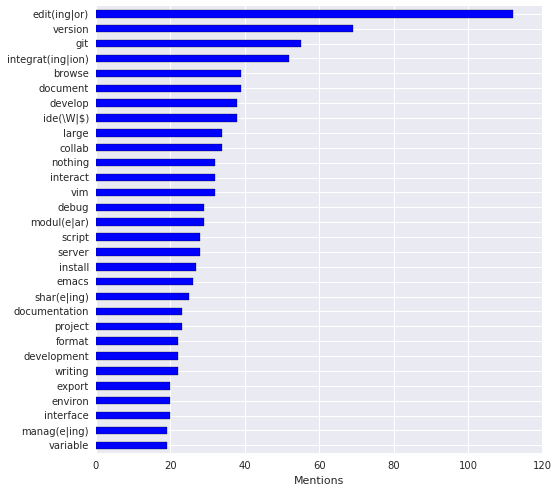

In [73]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Topic Model

The manual tagging above is but one way of breaking down the responses into themes. I wanted to try another approach as validation. So I experimented with LSA and clustering to see how they would group responses.

After searching over the number of topics and clusters, I do see some themes like "version control" and "text editing" emerge. With nearly all settings, some large clusters remain that seem to be a grab bag of topics.

In [24]:
import gensim
import string
import requests

In [25]:
texts = gensim.parsing.preprocess_documents(responses)

In [26]:
dictionary = gensim.corpora.Dictionary(texts)

In [27]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [28]:
tfidf = gensim.models.TfidfModel(corpus)

In [29]:
corpus_tfidf = tfidf[corpus]

In [30]:
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, DBSCAN
from gensim.matutils import corpus2csc

I informally experimented with the topic and cluster counts for quite some time, looking at the inertia graph and the resulting cluster sizes.

In [31]:
# set the number of clusters, must be >=1
topics_n = 10
clusters_n = 10

In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
import math

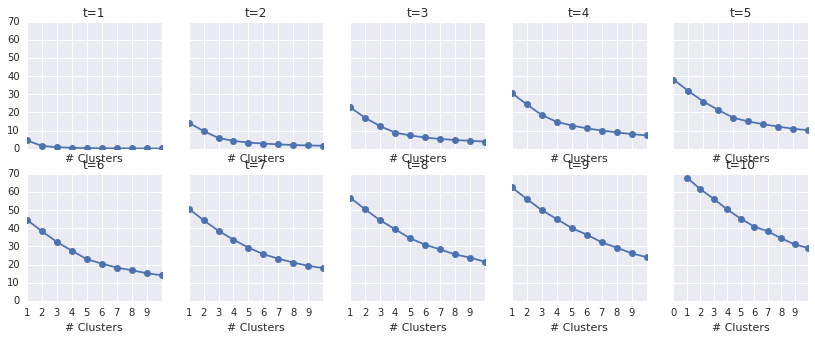

In [34]:
fig, axes = plt.subplots(math.ceil(topics_n / 5), 5, sharex=True, sharey=True, figsize=(14, 5))

for t in range(1, topics_n+1):
    inertia = [np.NaN]
    lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=t)
    corpus_lsi = lsi[corpus_tfidf]
    X = corpus2csc(corpus_lsi).transpose()
    
    for k in range(1,clusters_n+1):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
#         print('k = %d, inertia= %f' % (k, k_means.inertia_ ))
        inertia.append(k_means.inertia_)

    ax = axes[(t-1) // 5][(t-1) % 5]
    ax.plot(inertia, '-o')
    ax.set_xticks(range(clusters_n))
    ax.set_title('t=%d' % t)
#     ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')

Here's 4 topics, 10 clusters.

In [35]:
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4)
corpus_lsi = lsi[corpus_tfidf]
X = corpus2csc(corpus_lsi).transpose()
k_means = KMeans(n_clusters=10)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [36]:
clusters = pd.Series(k_means.labels_, index=responses.index)
clusters.value_counts()

5    279
0    144
9    124
6     72
2     60
8     29
3     19
7     15
1     12
4      9
dtype: int64

In [37]:
tagged['cluster'] = clusters

Cluster 2 is about version control, for example.

In [38]:
tagged[tagged.cluster == 2].head(10)

,hinderances,themes,cluster
21,not too easy to integrate into a git workflow (diffs don't look nice and it is hard to see what has changed),"version,",2
26,Lack of multi-cell copy/paste (until now). Difficulties with version control and large notebooks. Poor documentation in general. Relatively frequent changes to the notebook format.,"reuse,development,disseminate,version,setup,",2
39,- tighter integration with version control - cross project/directory search of notebooks - deployable notebooks - persistent widgets,"development,disseminate,version,",2
41,Lacking nice github integration Interactive figures are cumbersome (at least I haven't found the right tools),"development,version,",2
89,"Git integration, CSS themes","development,version,setup,",2
95,I find it difficult to collaborate with colleagues who are all using Git. It is much easier to do this with plain Python files.,"collab,version,external,",2
97,"They are difficult to use with version control, and I prefer development in a text editor over development in a browser window.","development,version,",2
104,static checking of code (ala pyflakes) better integration with version control better editor inside the code blocks,"development,version,",2
105,Version control with git. Cell merging. Cell grouping and hiding. Vim key bindings.,"development,version,",2
117,- Not available on all my computing environments and I have been struggling with jupyterhub setup. - No easy workflow with a version control system such as git . Need a markup language in comments to create a mapping between notebook cells and traditional flat files. - Detect running dependencies between cells. Warn when a variable is reassigned between cells . This might indicate a cell cannot be refreshed without refreshing the previous one.,"development,version,setup,",2


Cluster 1 is about IDEs and development environments.

In [39]:
tagged[tagged.cluster == 1].head(10)

,hinderances,themes,cluster
110,The only time I don't use it is when I need to run a script that needs to go for several hours on end. Or for tasks that I need to pass along to others.,"development,",1
165,No need to use more often.,"nothing,",1
186,Need search/find (4.1 when available) Need diff tool for Notebooks,"development,version,",1
348,"At times I need to use other work environments (e.g. Atom) when I need other tools, e.g. non-exploratory work.","setup,",1
396,other work that needs to be done ;-),,1
563,"Nothing, I just don't need it more often.","nothing,",1
590,An editor needs to be part of it.,"development,",1
627,"Nothing, I just don't need interactive development that often.","development,nothing,",1
747,No further need,,1
764,I don't need to do this type of work more often,,1


Cluster 5, the largest cluster, does not have a good separation of topics.

In [40]:
tagged[tagged.cluster == 5].head(10)

,hinderances,themes,cluster
1,Ways to hide helper function definitions (or easier ways to import functions from notebooks). But those might be bad practices,,5
5,lazyness,,5
7,"- a standard option of converting the notebook to html, pdf,... with or without code cells, input/output prompts. - easy integration in a static website (e.g. sphinx, ...) where that static website is used as a sort of reporting tool - when converting to a certain format (rst, md, ...) the rendering of the output (e.g. pandas dataframes) also in that format provided the package has implemented this (e.g. pandas dataframes: in te notebook html representation, when converted to markdown a markdown representation,...)","reuse,development,disseminate,",5
9,Maybe figure out how to schedule automated execution of notebooks?,"reuse,",5
13,My coworkers do not use them. Keybindings clash with vimperator.,"development,",5
15,Corporate IT policy Colleagues' lack of knowledge of PyData stack,"external,",5
23,"IDE capabilities: debugging UI, refactorings,...","development,",5
27,Hub support for Windows. Better kernel reliability on Windows.,"setup,robust,",5
28,"Improved workflow to create reports with it. Just being able to cite papers from a bibtex file, spellchecking, reordering of chapters would be nice.","disseminate,",5
34,"Lack of proper debugging tools (comparable to e.g. Eclipse IDE, Visual Studio or Matlab).","development,language,",5
